### Make sure GPU is on

https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
import tensorflow_datasets as tfds
import random 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.util import montage

### (10 pts.) Prepare the datasets

#### load the plant_village data from tensorflow_datasets. Split by %80-10-10 train-val-test using split= input.

#### Please check https://www.tensorflow.org/datasets/splits

In [4]:
#train_ds, test_ds = tfds.load('plant_village', split=['train', 'test'])

#tfds.load("mnist", split="test[:99%]")

raw_train = tfds.load('plant_village', split='train[:80%]', as_supervised=True)
raw_val = tfds.load('plant_village', split='train[80:90%]', as_supervised=True)
raw_test = tfds.load('plant_village', split='train[90:100%]', as_supervised=True)

#(training_set, test_set, validation_set), dataset_info = tfds.load('plant_village', split=[ 
   #    tfds.Split.TRAIN.subsplit(tfds.percent[:70]),
    #   tfds.Split.TEST.subsplit(tfds.percent[:10]),
    #   tfds.Split.VALIDATION.subsplit(tfds.percent[:10])
#],
#with_info=True,
#as_supervised=True
#)


#(raw_train, raw_validation, raw_test), metadata = tfds.load(
#'plant)village',
#split=['train[:80]', 'train[:10]', 'train[:10]'],
#with_info=True,
#as_supervised=True,)


#splits = ("train[:80]", "train[:10]", "train[:10]")

#(raw_train, raw_validation, raw_test), metadata = tfds.load('plant_village', split=splits, with_info=True, as_supervised=True)


#get_label_name = metadata.features['label'].int2str

#for image, label in raw_validation.take(10):
#  plt.figure()
#  plt.imshow(image)
#  plt.title(get_label_name(label))


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/plant_village/1.0.0.incomplete8EJQEI/plant_village-train.tfrecord


Dataset plant_village downloaded and prepared to /root/tensorflow_datasets/plant_village/1.0.0. Subsequent calls will reuse this data.


In [5]:
raw_train
raw_val
raw_test


<DatasetV1Adapter shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

#### Normalize each image into [0,1] range, shuffle and minibatch 128.

In [0]:
pp_test = raw_test.map(lambda img, label:(tf.image.convert_image_dtype(img/255, tf.float32),label)).shuffle(1024).batch(128)
pp_val = raw_val.map(lambda img, label:(tf.image.convert_image_dtype(img/255, tf.float32),label)).batch(128)
pp_train = raw_train.map(lambda img, label:(tf.image.convert_image_dtype(img/255, tf.float32),label)).batch(128)


<DatasetV1Adapter shapes: (None, 0, 1), types: tf.float32>


#### Display the examples from the dataset.

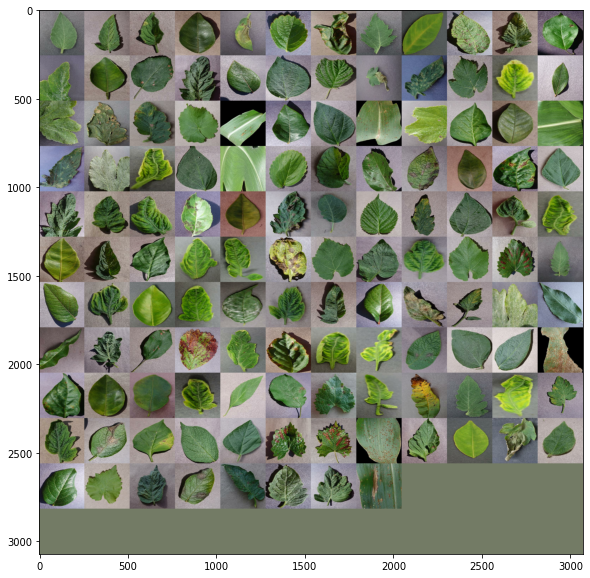

In [15]:
plt.figure(figsize=(10,10))
for example in pp_val.take(1):  # Only take a single example
  image, label = example[0], example[1]
  plt.imshow(montage(image, multichannel=True))

### (20 pts) The Fully Connected Neural Network implementation

#### It is a 4 layer (Fully Connected) Neural Network. The feature depths are [512,256,128] and last softmax layer has 38 output. Train for 10 epochs, with 0.001 learning rate and categorical cross entropy.

In [17]:
model = tf.keras.models.Sequential([
  ### Flatten
  tf.keras.layers.Flatten(input_shape=(256,256,3)),
  tf.keras.layers.Dense(512,activation = 'relu'),
  tf.keras.layers.Dense(256,activation = 'relu'),
  tf.keras.layers.Dense(128,activation = 'relu'),
  tf.keras.layers.Dense(38,activation = 'softmax')
])

model.compile(
   ### loss function sparse_categorical_crossentropy
    loss='sparse_categorical_crossentropy',
    ### Adam optimizer
    optimizer= tf.keras.optimizers.Adam(lr=0.001),
     ### metrics
    metrics=['accuracy']
)

history = model.fit(
    pp_train,
    epochs=10,
    validation_data=pp_val,
)


Epoch 1/10
340/340 [==============================] - 51s 149ms/step - loss: 9.5426 - accuracy: 0.2790 - val_loss: 2.4974 - val_accuracy: 0.3631
Epoch 2/10
340/340 [==============================] - 51s 150ms/step - loss: 2.1467 - accuracy: 0.4309 - val_loss: 2.0506 - val_accuracy: 0.4513
Epoch 3/10
340/340 [==============================] - 50s 148ms/step - loss: 1.7818 - accuracy: 0.5070 - val_loss: 1.6460 - val_accuracy: 0.5310
Epoch 4/10
340/340 [==============================] - 51s 151ms/step - loss: 1.5312 - accuracy: 0.5578 - val_loss: 1.5638 - val_accuracy: 0.5485
Epoch 5/10
340/340 [==============================] - 51s 150ms/step - loss: 1.3842 - accuracy: 0.5922 - val_loss: 1.4061 - val_accuracy: 0.5866
Epoch 6/10
340/340 [==============================] - 51s 150ms/step - loss: 1.2585 - accuracy: 0.6225 - val_loss: 1.2766 - val_accuracy: 0.6231
Epoch 7/10
340/340 [==============================] - 51s 151ms/step - loss: 1.1565 - accuracy: 0.6507 - val_loss: 1.2505 - val_ac

#### Plot training & validation accuracy values

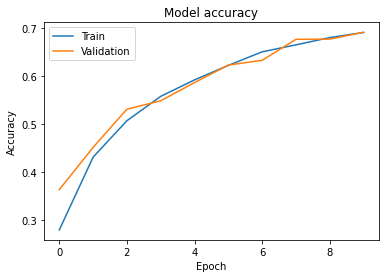

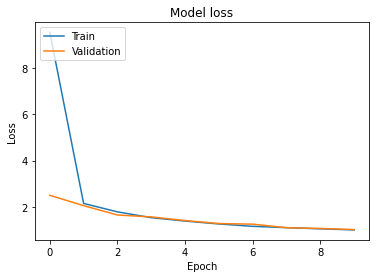

In [18]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Calculate test set

In [19]:
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(pp_test)
print('test loss, test acc:', results)


# Evaluate on test data
43/43 [==============================] - 7s 165ms/step - loss: 0.9807 - accuracy: 0.7018
test loss, test acc: [0.9807173609733582, 0.7018415927886963]


### (20 pts.) The Convolutional Neural Network implementation

#### It is a 4 layer Convolutional Neural Network. First two layers are Convolutional and last two layers are Fully Connected. The depths are [64,128,64] and the last softmax layer has 38 output. Train for 10 epochs, with 0.001 learning rate and categorical cross entropy.

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import numpy as np

model_cnn = tf.keras.models.Sequential([
  ### Conv2D layer
  ### MaxPooling2D layer
  ### Conv2D layer
  ### MaxPooling2D layer
  ### Flatten
  ### Dense
  ### Dense softmax


  tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=2, activation='relu',input_shape=(256,256,3)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=1, padding='same'),
  tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=1, padding='same'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(38, activation='softmax')
 
])

model_cnn.compile(
    
    ### Adam optimizer
    optimizer=tf.keras.optimizers.Adam(),
    ### loss function sparse_categorical_crossentropy
    loss='sparse_categorical_crossentropy',
    ### metrics
    metrics=['sparse_categorical_accuracy']

    
)



history_cnn = model_cnn.fit(
    pp_train,
    epochs=10,
    validation_data=pp_val,
)

Epoch 1/10
340/340 [==============================] - 78s 229ms/step - loss: 1.8566 - sparse_categorical_accuracy: 0.6198 - val_loss: 0.7529 - val_sparse_categorical_accuracy: 0.7807
Epoch 2/10
340/340 [==============================] - 78s 228ms/step - loss: 0.4705 - sparse_categorical_accuracy: 0.8541 - val_loss: 0.6256 - val_sparse_categorical_accuracy: 0.8306
Epoch 3/10
340/340 [==============================] - 77s 227ms/step - loss: 0.2527 - sparse_categorical_accuracy: 0.9212 - val_loss: 0.7369 - val_sparse_categorical_accuracy: 0.8159
Epoch 4/10
340/340 [==============================] - 77s 227ms/step - loss: 0.1648 - sparse_categorical_accuracy: 0.9480 - val_loss: 0.8047 - val_sparse_categorical_accuracy: 0.8094
Epoch 5/10
340/340 [==============================] - 77s 226ms/step - loss: 0.1114 - sparse_categorical_accuracy: 0.9648 - val_loss: 0.7713 - val_sparse_categorical_accuracy: 0.8321
Epoch 6/10
340/340 [==============================] - 77s 226ms/step - loss: 0.0886 -

#### Plot training & validation accuracy values

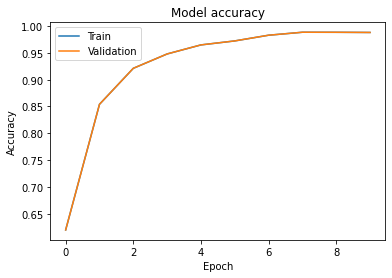

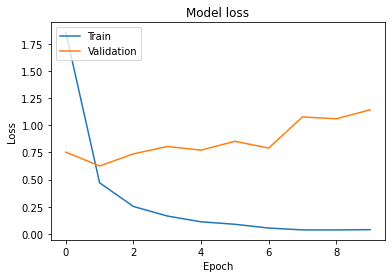

In [22]:
# Plot training & validation accuracy values
plt.plot(history_cnn.history['sparse_categorical_accuracy'])
plt.plot(history_cnn.history['sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Calculate test set

In [23]:
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model_cnn.evaluate(pp_test)
print('test loss, test acc:', results)


# Evaluate on test data
43/43 [==============================] - 9s 219ms/step - loss: 1.1251 - sparse_categorical_accuracy: 0.8055
test loss, test acc: [1.125059962272644, 0.8055248856544495]
